<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-feracor/blob/main/A01794022_Actividad_Semanal_7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

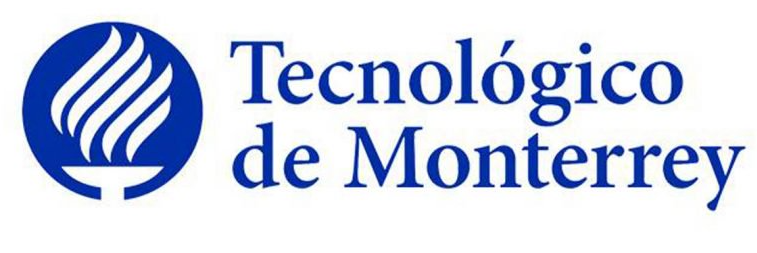

# **Ciencia y analítica de datos**
**Actividad Semanal - 9 de Noviembre  de 2022**

**María de la Paz Rico Fernández. - Maricarmen Vázquez Rojí**



*   Fernando Acevedo Ortegate - A01794022   



# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

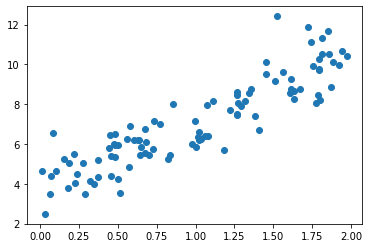

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

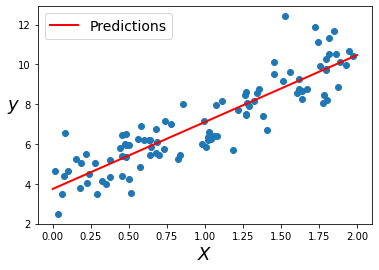

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

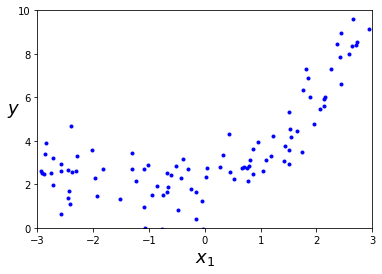

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

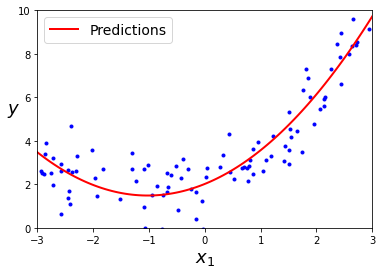

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

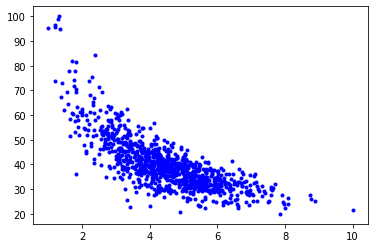

In [27]:
plt.plot(X,y,'b.')


# Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar

In [28]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate



##Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)



##Regresión Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [30]:
# Ecuacion

print('La ecuacion del modelo de regresion lineal es: Y =', linear_reg.coef_,'X +', linear_reg.intercept_)

La ecuacion del modelo de regresion lineal es: Y = [[3.36555744]] X + [3.74406122]


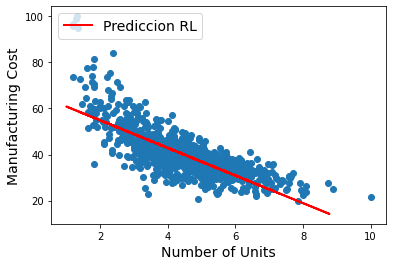

In [31]:
# Visualizacion

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_regresion = X_test 
y_regresion = linear_reg.predict(X_regresion)
plt.scatter(X_train, y_train)
plt.plot(X_regresion, y_regresion, "r-", linewidth=2, label="Prediccion RL")
plt.xlabel("Number of Units", fontsize=14)
plt.ylabel("Manufacturing Cost", rotation=90, fontsize=14)
plt.legend(loc="upper left", fontsize=14);

In [32]:
# Errores

mae_list =[]
r2_list =[]

mae_rls = metrics.mean_absolute_error(y_test,y_regresion)
mae_list.append(mae_rls)
r2_rls = r2_score(y_test,y_regresion)
r2_list.append(r2_rls)

print('El Error Medio Absoluto (MAE) es: ', metrics.mean_absolute_error(y_test,y_regresion))
print('El Error Medio Cuadrado (RMSE) es: ', np.sqrt(metrics.mean_squared_error(y_test, y_regresion)))



El Error Medio Absoluto (MAE) es:  5.013587781954963
El Error Medio Cuadrado (RMSE) es:  7.108963321847682


In [33]:
# r cuadrado
print('La r cuadrada es: ', r2_score(y_test,y_regresion))

La r cuadrada es:  0.6116251549562579


##Regresión Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.



In [34]:
# Ecuacion

rlp = PolynomialFeatures(degree=2, include_bias=False)
X_rlp = rlp.fit_transform(X_train) 

rl_pol = LinearRegression(fit_intercept=True)
rl_pol.fit(X_rlp, y_train)
rl_pol.coef_, rl_pol.intercept_

print('La ecuacion del modelo es: Y =', rl_pol.coef_[1],'X^2 +', 
      rl_pol.coef_[0],'X +',rl_pol.intercept_)


La ecuacion del modelo es: Y = 1.1313609537119216 X^2 + -16.406381017212386 X + 88.80179909112496


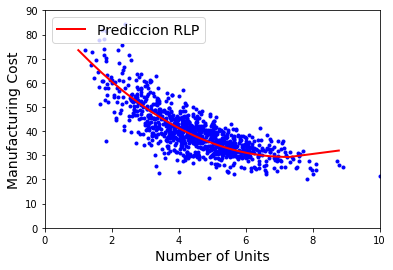

In [35]:
# Visualizacion

order = np.argsort(X_test.values.ravel()) 
X_rlp_test = rlp.fit_transform(X_test)
y_rlp = rl_pol.predict(X_rlp_test)

sortedXPoly = X_test.values.ravel()[order] 
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_rlp[order]

plt.plot(X, y, "b.") 
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Prediccion RLP")
plt.xlabel("Number of Units", fontsize=14)
plt.ylabel("Manufacturing Cost", rotation=90, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);

In [36]:
# Errores

mae_rlm = metrics.mean_absolute_error(y_test,y_rlp)
mae_list.append(mae_rlm) 
r2_rlm = r2_score(y_test,y_rlp)
r2_list.append(r2_rlm)

metrica_mae = metrics.mean_absolute_error(y_test, y_rlp)
r2Score = r2_score(y_test, y_rlp)
print('El Error medio Absoluto (MAE) es :', metrica_mae)
print('El Error Medio Cuadrado (RMSE) es: ', np.sqrt(metrics.mean_squared_error(y_test, y_rlp)))

El Error medio Absoluto (MAE) es : 4.3833025759681075
El Error Medio Cuadrado (RMSE) es:  5.832771301068423


In [37]:
# r cuadrado

print('La r cuadrada es: ',r2Score)

La r cuadrada es:  0.7385501224942537


##Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### Ridge

In [38]:
# Ecuacion Ridge

mod_ridge = Ridge(alpha=5.0,fit_intercept=True)
mod_ridge.fit(X_train, y_train)
X_ridge = X_test 
y_ridge = mod_ridge.predict(X_ridge)

print('La ecuacion del modelo de Ridge es: Y =', mod_ridge.coef_,'X +', mod_ridge.intercept_)

La ecuacion del modelo de Ridge es: Y = [-5.97003397] X + 66.75243237759665


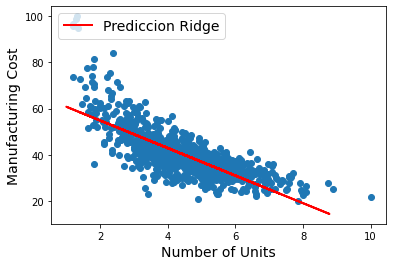

In [39]:
# Visualizacion Ridge

plt.scatter(X_train, y_train)
plt.plot(X_ridge, y_ridge, "r-", linewidth=2, label="Prediccion Ridge")
plt.xlabel("Number of Units", fontsize=14)
plt.ylabel("Manufacturing Cost", rotation=90, fontsize=14)
plt.legend(loc="upper left", fontsize=14);

In [40]:
# Errores Ridge

mae_ridge = metrics.mean_absolute_error(y_test,y_ridge)
mae_list.append(mae_ridge)
r2_ridge= r2_score(y_test,y_ridge)
r2_list.append(r2_ridge)

mae_ridge = metrics.mean_absolute_error(y_test, y_ridge)
r2Score = r2_score(y_test, y_ridge)

print('El Error medio Absoluto (MAE) es ', mae_ridge)
print('El Error Medio Cuadrado (RMSE) es: ', np.sqrt(metrics.mean_squared_error(y_test, y_ridge)))

El Error medio Absoluto (MAE) es  5.0162057389928325
El Error Medio Cuadrado (RMSE) es:  7.1111119498200965


In [41]:
# r cuadrada Ridge

print('La r cuadrada es: ',r2Score)

La r cuadrada es:  0.6113903530239646


### Lasso

In [42]:
# Ecuacion Lasso

mod_lasso = Lasso(alpha=5.0,fit_intercept=True) 
mod_lasso.fit(X_train, y_train)
X_lasso = X_test  
y_lasso = mod_lasso.predict(X_lasso)

print('La ecuacion del modelo de Lasso es: Y =', mod_lasso.coef_,'X +', mod_lasso.intercept_)

La ecuacion del modelo de Lasso es: Y = [-3.15572458] X + 54.16195119377413


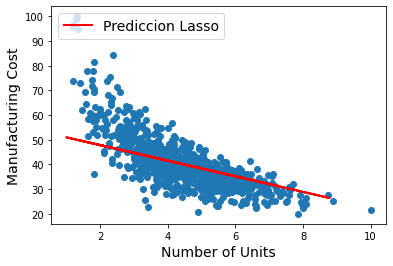

In [43]:
# Visualizacion Lasso

plt.scatter(X_train, y_train)
plt.plot(X_lasso, y_lasso, "r-", linewidth=2, label="Prediccion Lasso")
plt.xlabel("Number of Units", fontsize=14)
plt.ylabel("Manufacturing Cost", rotation=90, fontsize=14)
plt.legend(loc="upper left", fontsize=14);

In [44]:
# Errores Lasso

mae_lasso = metrics.mean_absolute_error(y_test,y_lasso)
mae_list.append(mae_lasso)
r2_lasso= r2_score(y_test,y_lasso)
r2_list.append(r2_lasso)

metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_lasso)
r2Score = r2_score(y_test, y_lasso)
print('El Error medio Absoluto (MAE) es ', metrica_mae_lasso)
print('El Error Medio Cuadrado (RMSE) es: ', np.sqrt(metrics.mean_squared_error(y_test, y_lasso)))

El Error medio Absoluto (MAE) es  5.681207654677401
El Error Medio Cuadrado (RMSE) es:  8.409660991642687


In [45]:
# r cuadrada Lasso

print('r2_score',r2Score)

r2_score 0.456505036516648


In [46]:
print(mae_list)
print(r2_list)

[5.013587781954963, 4.3833025759681075, 5.0162057389928325, 5.681207654677401]
[0.6116251549562579, 0.7385501224942537, 0.6113903530239646, 0.456505036516648]


##Finalmente grafica :


MAE (de los cuatro métodos)


R2 (de los cuatro métodos)

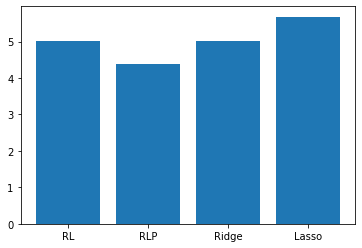

In [47]:
#Grafico MAE

metodo=list()
metodo.append('RL')
metodo.append('RLP')
metodo.append('Ridge')
metodo.append('Lasso')

plt.bar(metodo, mae_list)
plt.show()

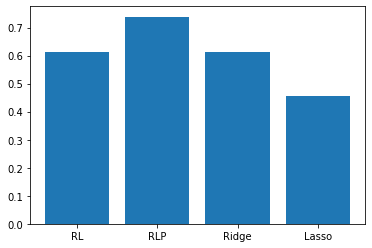

In [48]:
#Grafico r2

metodo=list()
metodo.append('RL')
metodo.append('RLP')
metodo.append('Ridge')
metodo.append('Lasso')

plt.bar(metodo, r2_list)
plt.show()

##Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?


* El metodo mas conveniente para la emprea es RLP ya que dentro de los medelos evaluados es el que presenta menor tasa de error MAE RMSE.

* Se hace uso de un grupo de 10% de datos para la evaluacion, el restante para entrenamiento.

* Estos son los errores obtenidos para el modelo RLP, el cual muestra mejores resultados:
  -  El Error medio Absoluto (MAE) es : 4.3833025759681075
  -  El Error Medio Cuadrado (RMSE) es:  5.832771301068423

* De entre los cuatro es el mejor, al ver la grafica de scatterplot y el resultado de la ecuacion que abarca la mayor cantidad de datos, se observa que abarca la mejor cobertura, lo cual se refleja en un r cuadrado alto, tando la mejor presicion de los modelos


# Ejercicio 2. Regresión múltiple

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz


Encuentra el numero ideal de almacenes, justifica tu respuesta:

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.
Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
¿Consideras importante que se grafique en un mapa?, ¿por qué?
Agrega las conclusiones

In [49]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 409 kB/s 
     |████████████████████████████████| 1.0 MB 48.4 MB/s 
     |████████████████████████████████| 1.7 MB 35.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 71.3 MB/s 
     |████████████████████████████████| 6.3 MB 62.3 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=fedeeb6f242c1079ba4927a9ac91ada853b88eb6d33b848dca6c1e51e25d82cc
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=e31643727caf2bacbbbff6c29c082623aa41e6cfc2baf20ab4d24ea779bd3d3d
  Stored in directory: /root/.

In [50]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [51]:
# Importar base de datos
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [52]:
# Explorar tados
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [54]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

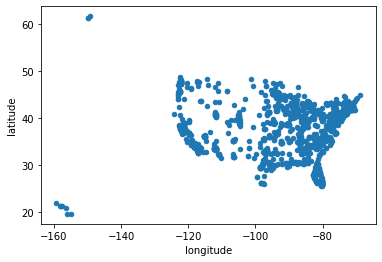

In [55]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [56]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [57]:
#Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. 
#Esto nos ayudara a tener un mejor entendimiento de ellos. 

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();


In [58]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [59]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [60]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [61]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

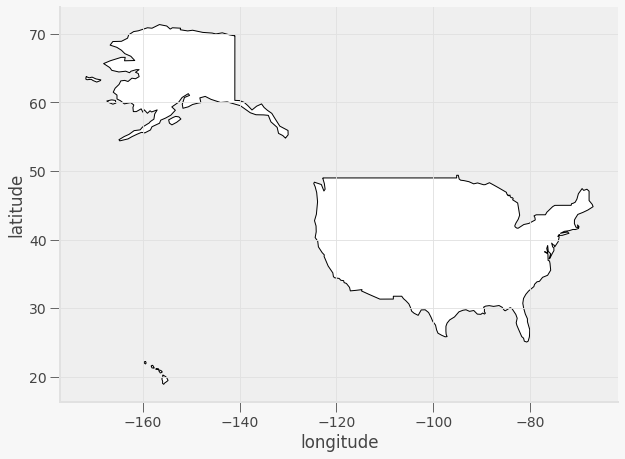

In [62]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

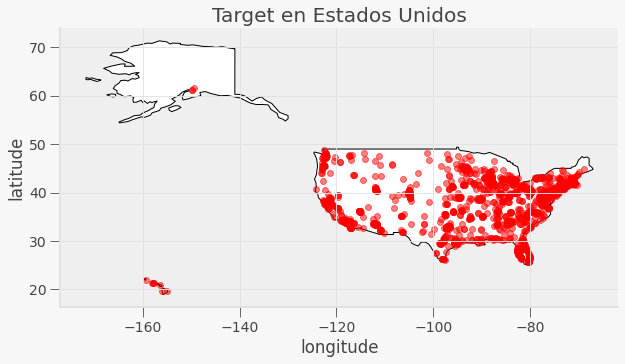

In [63]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## Mi codigo

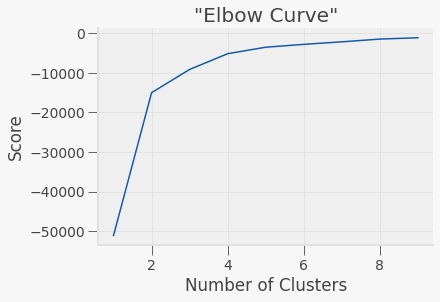

In [64]:
from sklearn.cluster import KMeans

#Quie es un cluster? es una agrupacion de elementos, en este caso de los puntos que representan las tiendas, para este caso podemos visualizar una clusterizacion como una region.
#Asi como lo ven lo escribi mientras que rigo explicaba, soy buen mecanografo.
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters] #Aqui vamos evaluadno el kmeans en un numero de clusters, para ver cual es el mejor
#Cada cluster, para terminos del ejercicio, sera un almacen estimado, para un grupo de tiendas kmean
Y_axis = latlong[['latitude']]
X_axis = latlong[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] #Evalua tus componentes minimos, 
#El score es la suma de las distancias del centroide a sus "k" vecinos más cercanos, entre menos vecinos el valor es más grande y es negativa

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('"Elbow Curve"')
plt.show()

#Em el codo se ve que el 3 es lo mas mejor, porque a partir de ahi ya empieza a sobre entrenarse haciendo un kmean para cada tienda, y no teniendo una agrupacion de tiendas cercanas 
#Los vaores en y son las latitudes, la companera elmy esta con mucho trabajo, y no ha leido, ahi se los dejo para que le reclamen despues, 
#El metodo elbow curve, nos permite ver la candida de tiendas que necesitamos
#Dangeti, P. (2017). The elbow method. In Statistics for Machine Learning. Birmingham, UK: O´REILLY.
#https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml#:~:text=The%20elbow%20method%20is%20used,by%20different%20values%20of%20k.


In [65]:

#Sabiendo que solo usaremos 3 clusters porque asi lo dice la grafica, 

kmeans = KMeans(n_clusters = 3, init ='k-means++') #Aqui no creamos nuevos clusters, solamente re creamos 3, que son los que necesitamos
# clusterizamos, entreanndo el kmeans 
kmeans.fit(latlong[latlong.columns[0:2]])
# ahora guardamos los resultados
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 0, 2, 0], dtype=int32)

In [66]:
X = df[["longitude","latitude"]]

kmeans = KMeans(n_clusters=3).fit(X) #Alimentamos el cluster con nuestro dataframe, entrenamos al kmeans
centroids = kmeans.cluster_centers_ # Los cdentroides son los centros de cada kmean, hasta aqui son dos columnas de coorddenadas
labels = kmeans.predict(X) # Son los datos 
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C) #Hacemos un dataframe con las dos columnas de las coordenadas
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #Aqui cibvertimos el dataframe a lista, para despues pasarlos a puntos coordenadas
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #Aqui creamos los puntos coordenadas a partir del datagrame


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates") #Geopandas, necesita  puntos coordenadas para 
gdf_C


,0,1,Coordinates
0,-93.279950,37.987914,POINT (-93.27995 37.98791)
1,-118.624473,37.487342,POINT (-118.62447 37.48734)
2,-78.534390,37.782609,POINT (-78.53439 37.78261)


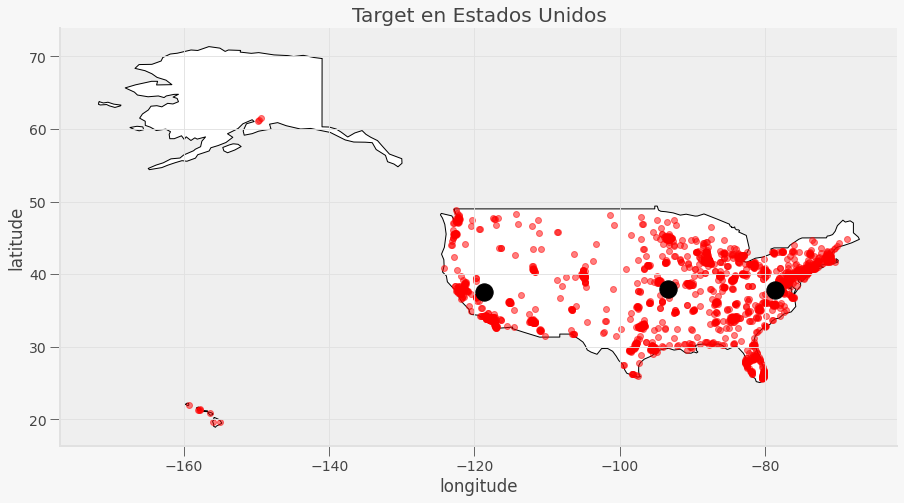

In [67]:
fig, gax = plt.subplots(figsize=(15,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') #Aqui traemos el mapa de los unites

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5) #Aqui grafica los datos originales
gdf_C.plot(ax=gax, color='black', alpha = 1, markersize = 300) #Aqui grafica los datos de nuestro dataset de arriba

#De aqui para abajo es puro ploting busines
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


In [68]:
# ¿a cuantas tiendas va surtir? 
##Conteo de tiendas por cada cluster
latlong['kmeans'] = kmeans.labels_  #Latlong es nuestro DataFrame, de aho agarramos la columna kmeans y sacamos las etiquetas de nuestros clusters, los cuales on 3, osea 0 ,1 y 2, en efecto
latlong.loc[:, 'kmeans'].value_counts() #Despues contamos la canitdad de valores en cada kmeans


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2    826
0    628
1    385
Name: kmeans, dtype: int64

In [69]:
gdf_C

,0,1,Coordinates
0,-93.279950,37.987914,POINT (-93.27995 37.98791)
1,-118.624473,37.487342,POINT (-118.62447 37.48734)
2,-78.534390,37.782609,POINT (-78.53439 37.78261)


In [70]:
from pandas.core.internals.concat import concat_arrays

#print(gdf_C[0][0])
#print(gdf_C[1][0])
#Obtenemos los valores de nuestro dataset de clusters, obtenemos las geolocalizaciones, 
Location1 = str(gdf_C[1][0]) + ", " + str(gdf_C[0][0]) #Aqui es alrevez, osea la coordenada x esta en la columna 1, y la y en la columna 0 , por eso medio misterioso esta llamada
print(Location1)
Location2 = str(gdf_C[1][1]) + ", " + str(gdf_C[0][1])
print(Location2)
Location3 = str(gdf_C[1][2]) + ", " + str(gdf_C[0][2])
print(Location3)

# ¿qué ciudad es?  
#Con esas coordenadas, investigmoas una libreria con mapas y la alimentamos


37.98791363565769, -93.27994961093502
37.48734203064935, -118.62447331844157
37.78260864094776, -78.53438980340219


In [76]:
# ¿sabes a que distancia estará? 

#LAs geopy son las que usamos estamos 
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="my-application") #Inicializamos la libreria
Locations = [Location1, Location2, Location3] #Metemos las coordenadas obtenidas

for i in Locations:
  location = geolocator.reverse(i) #Reverse porque?, porque normal tu le metes el lugar y te da la direccion, pero si le volteas la tortilla, le metes la latitud, y te devuelve  la ciudad, 
  print('Almacen:', location.address)

#locations1 = geolocator.reverse(Location1) #Aqui es cuando yo le estaba explicando a rigo antes de la clase, nada relevante, 
#locations2 = geolocator.reverse(Location2)


Almacen: State Highway U, Hickory County, Missouri, 65668, United States
Almacen: Paradise Estates, Mono County, California, United States
Almacen: James River Road, Scottsville, Albemarle County, Virginia, 24590, United States


In [75]:
#Aqui sacamos las distancias entre los 3 almacenes

distancia1 = str(geodesic(Location1, Location2).miles)
print("Distancia entre el primer y segundo almacen : ", float(distancia1)/1.16, "km") 
distancia2 = str(geodesic(Location2, Location3).miles)
print("Distancia entre el segundo y tercer almacen : ", float(distancia2)/1.16, "km")


Distancia entre el primer y segundo almacén :  1193.3280767885826 km
Distancia entre el segundo y tercer almacén :  1880.7376600366208 km
